In [1]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=yf.download('^GSPC',start='2010-01-01')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-12-31,1126.599976,1127.640015,1114.810059,1115.099976,1115.099976,2076990000
2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000
2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000
2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000
2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000
...,...,...,...,...,...,...
2022-12-16,3890.909912,3890.909912,3827.909912,3852.360107,3852.360107,7493660000
2022-12-19,3853.790039,3854.860107,3800.040039,3817.659912,3817.659912,3969610000
2022-12-20,3810.469971,3838.239990,3795.620117,3821.620117,3821.620117,3985370000


In [3]:
df['returns']=np.log(df.Close.pct_change()+1)
df

,Open,High,Low,Close,Adj Close,Volume,returns
Date,,,,,,,
2009-12-31,1126.599976,1127.640015,1114.810059,1115.099976,1115.099976,2076990000,NaN
2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000,0.015916
2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000,0.003111
2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000,0.000545
2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000,0.003993
...,...,...,...,...,...,...,...
2022-12-16,3890.909912,3890.909912,3827.909912,3852.360107,3852.360107,7493660000,-0.011200
2022-12-19,3853.790039,3854.860107,3800.040039,3817.659912,3817.659912,3969610000,-0.009048
2022-12-20,3810.469971,3838.239990,3795.620117,3821.620117,3821.620117,3985370000,0.001037


In [4]:
def lagit(df,lags):
    names=[]
    for i in range(1,lags+1):
        df['Lag_'+str(i)]=df['returns'].shift(i)
        names.append('Lag_'+str(i))
    return names
lagnames=lagit(df,5)
lagnames

['Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5']

In [5]:
df

,Open,High,Low,Close,Adj Close,Volume,returns,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5
Date,,,,,,,,,,,,
2009-12-31,1126.599976,1127.640015,1114.810059,1115.099976,1115.099976,2076990000,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000,0.015916,NaN,NaN,NaN,NaN,NaN
2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000,0.003111,0.015916,NaN,NaN,NaN,NaN
2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000,0.000545,0.003111,0.015916,NaN,NaN,NaN
2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000,0.003993,0.000545,0.003111,0.015916,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-16,3890.909912,3890.909912,3827.909912,3852.360107,3852.360107,7493660000,-0.011200,-0.025237,-0.006071,0.007263,0.014178,-0.007377
2022-12-19,3853.790039,3854.860107,3800.040039,3817.659912,3817.659912,3969610000,-0.009048,-0.011200,-0.025237,-0.006071,0.007263,0.014178
2022-12-20,3810.469971,3838.239990,3795.620117,3821.620117,3821.620117,3985370000,0.001037,-0.009048,-0.011200,-0.025237,-0.006071,0.007263


In [6]:
df.dropna(inplace=True)
from sklearn.linear_model import LinearRegression

In [7]:
model=LinearRegression()

In [8]:
model.fit(df[lagnames],df['returns'])

LinearRegression()

In [9]:
df[lagnames]

,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5
Date,,,,,
2010-01-11,0.002878,0.003993,0.000545,0.003111,0.015916
2010-01-12,0.001745,0.002878,0.003993,0.000545,0.003111
2010-01-13,-0.009425,0.001745,0.002878,0.003993,0.000545
2010-01-14,0.008291,-0.009425,0.001745,0.002878,0.003993
2010-01-15,0.002423,0.008291,-0.009425,0.001745,0.002878
...,...,...,...,...,...
2022-12-16,-0.025237,-0.006071,0.007263,0.014178,-0.007377
2022-12-19,-0.011200,-0.025237,-0.006071,0.007263,0.014178
2022-12-20,-0.009048,-0.011200,-0.025237,-0.006071,0.007263


In [10]:
df['prediction_LR']=model.predict(df[lagnames])
df

,Open,High,Low,Close,Adj Close,Volume,returns,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,prediction_LR
Date,,,,,,,,,,,,,
2010-01-11,1145.959961,1149.739990,1142.020020,1146.979980,1146.979980,4255780000,0.001745,0.002878,0.003993,0.000545,0.003111,0.015916,0.000148
2010-01-12,1143.810059,1143.810059,1131.770020,1136.219971,1136.219971,4716160000,-0.009425,0.001745,0.002878,0.003993,0.000545,0.003111,0.000276
2010-01-13,1137.310059,1148.400024,1133.180054,1145.680054,1145.680054,4170360000,0.008291,-0.009425,0.001745,0.002878,0.003993,0.000545,0.001372
2010-01-14,1145.680054,1150.410034,1143.800049,1148.459961,1148.459961,3915200000,0.002423,0.008291,-0.009425,0.001745,0.002878,0.003993,-0.001379
2010-01-15,1147.719971,1147.770020,1131.390015,1136.030029,1136.030029,4758730000,-0.010882,0.002423,0.008291,-0.009425,0.001745,0.002878,0.000811
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-16,3890.909912,3890.909912,3827.909912,3852.360107,3852.360107,7493660000,-0.011200,-0.025237,-0.006071,0.007263,0.014178,-0.007377,0.002112
2022-12-19,3853.790039,3854.860107,3800.040039,3817.659912,3817.659912,3969610000,-0.009048,-0.011200,-0.025237,-0.006071,0.007263,0.014178,-0.000190
2022-12-20,3810.469971,3838.239990,3795.620117,3821.620117,3821.620117,3985370000,0.001037,-0.009048,-0.011200,-0.025237,-0.006071,0.007263,0.001620


In [11]:
df['direction_LR']=[1 if i > 0 else-1 for i in df.prediction_LR]
df

,Open,High,Low,Close,Adj Close,Volume,returns,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,prediction_LR,direction_LR
Date,,,,,,,,,,,,,,
2010-01-11,1145.959961,1149.739990,1142.020020,1146.979980,1146.979980,4255780000,0.001745,0.002878,0.003993,0.000545,0.003111,0.015916,0.000148,1
2010-01-12,1143.810059,1143.810059,1131.770020,1136.219971,1136.219971,4716160000,-0.009425,0.001745,0.002878,0.003993,0.000545,0.003111,0.000276,1
2010-01-13,1137.310059,1148.400024,1133.180054,1145.680054,1145.680054,4170360000,0.008291,-0.009425,0.001745,0.002878,0.003993,0.000545,0.001372,1
2010-01-14,1145.680054,1150.410034,1143.800049,1148.459961,1148.459961,3915200000,0.002423,0.008291,-0.009425,0.001745,0.002878,0.003993,-0.001379,-1
2010-01-15,1147.719971,1147.770020,1131.390015,1136.030029,1136.030029,4758730000,-0.010882,0.002423,0.008291,-0.009425,0.001745,0.002878,0.000811,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-16,3890.909912,3890.909912,3827.909912,3852.360107,3852.360107,7493660000,-0.011200,-0.025237,-0.006071,0.007263,0.014178,-0.007377,0.002112,1
2022-12-19,3853.790039,3854.860107,3800.040039,3817.659912,3817.659912,3969610000,-0.009048,-0.011200,-0.025237,-0.006071,0.007263,0.014178,-0.000190,-1
2022-12-20,3810.469971,3838.239990,3795.620117,3821.620117,3821.620117,3985370000,0.001037,-0.009048,-0.011200,-0.025237,-0.006071,0.007263,0.001620,1


In [12]:
df['start_LR']=df['direction_LR']*df['returns']
df#if prediction_LR is possitive asset will be hold
#when prediction_LR is negative asset will be short 

,Open,High,Low,Close,Adj Close,Volume,returns,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,prediction_LR,direction_LR,start_LR
Date,,,,,,,,,,,,,,,
2010-01-11,1145.959961,1149.739990,1142.020020,1146.979980,1146.979980,4255780000,0.001745,0.002878,0.003993,0.000545,0.003111,0.015916,0.000148,1,0.001745
2010-01-12,1143.810059,1143.810059,1131.770020,1136.219971,1136.219971,4716160000,-0.009425,0.001745,0.002878,0.003993,0.000545,0.003111,0.000276,1,-0.009425
2010-01-13,1137.310059,1148.400024,1133.180054,1145.680054,1145.680054,4170360000,0.008291,-0.009425,0.001745,0.002878,0.003993,0.000545,0.001372,1,0.008291
2010-01-14,1145.680054,1150.410034,1143.800049,1148.459961,1148.459961,3915200000,0.002423,0.008291,-0.009425,0.001745,0.002878,0.003993,-0.001379,-1,-0.002423
2010-01-15,1147.719971,1147.770020,1131.390015,1136.030029,1136.030029,4758730000,-0.010882,0.002423,0.008291,-0.009425,0.001745,0.002878,0.000811,1,-0.010882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-16,3890.909912,3890.909912,3827.909912,3852.360107,3852.360107,7493660000,-0.011200,-0.025237,-0.006071,0.007263,0.014178,-0.007377,0.002112,1,-0.011200
2022-12-19,3853.790039,3854.860107,3800.040039,3817.659912,3817.659912,3969610000,-0.009048,-0.011200,-0.025237,-0.006071,0.007263,0.014178,-0.000190,-1,0.009048
2022-12-20,3810.469971,3838.239990,3795.620117,3821.620117,3821.620117,3985370000,0.001037,-0.009048,-0.011200,-0.025237,-0.006071,0.007263,0.001620,1,0.001037


In [13]:
np.exp(df[['returns','start_LR']].sum())

returns     3.325115
start_LR    7.828860
dtype: float64

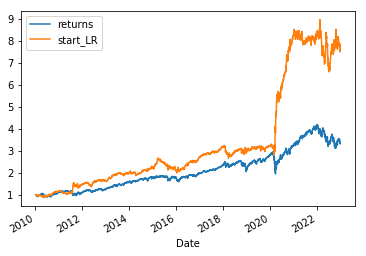

In [14]:
np.exp(df[['returns','start_LR']].cumsum()).plot()

In [15]:
from sklearn.model_selection import train_test_split
df=yf.download('^GSPC',start='2010-01-01')
df['returns']=np.log(df.Close.pct_change()+1)
def lagit(df,lags):
    names=[]
    for i in range(1,lags+1):
        df['Lag_'+str(i)]=df['returns'].shift(i)
        names.append('Lag_'+str(i))
    return names
lagnames=lagit(df,5)
lagnames
df.dropna(inplace=True)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,returns,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5
Date,,,,,,,,,,,,
2010-01-11,1145.959961,1149.739990,1142.020020,1146.979980,1146.979980,4255780000,0.001745,0.002878,0.003993,0.000545,0.003111,0.015916
2010-01-12,1143.810059,1143.810059,1131.770020,1136.219971,1136.219971,4716160000,-0.009425,0.001745,0.002878,0.003993,0.000545,0.003111
2010-01-13,1137.310059,1148.400024,1133.180054,1145.680054,1145.680054,4170360000,0.008291,-0.009425,0.001745,0.002878,0.003993,0.000545
2010-01-14,1145.680054,1150.410034,1143.800049,1148.459961,1148.459961,3915200000,0.002423,0.008291,-0.009425,0.001745,0.002878,0.003993
2010-01-15,1147.719971,1147.770020,1131.390015,1136.030029,1136.030029,4758730000,-0.010882,0.002423,0.008291,-0.009425,0.001745,0.002878
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-16,3890.909912,3890.909912,3827.909912,3852.360107,3852.360107,7493660000,-0.011200,-0.025237,-0.006071,0.007263,0.014178,-0.007377
2022-12-19,3853.790039,3854.860107,3800.040039,3817.659912,3817.659912,3969610000,-0.009048,-0.011200,-0.025237,-0.006071,0.007263,0.014178
2022-12-20,3810.469971,3838.239990,3795.620117,3821.620117,3821.620117,3985370000,0.001037,-0.009048,-0.011200,-0.025237,-0.006071,0.007263


In [16]:
train,test=train_test_split(df,shuffle=False,
                           test_size=0.3,random_state=0)

In [17]:
train=train.copy()

In [18]:
test=test.copy()

In [19]:
train

,Open,High,Low,Close,Adj Close,Volume,returns,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5
Date,,,,,,,,,,,,
2010-01-11,1145.959961,1149.739990,1142.020020,1146.979980,1146.979980,4255780000,0.001745,0.002878,0.003993,0.000545,0.003111,0.015916
2010-01-12,1143.810059,1143.810059,1131.770020,1136.219971,1136.219971,4716160000,-0.009425,0.001745,0.002878,0.003993,0.000545,0.003111
2010-01-13,1137.310059,1148.400024,1133.180054,1145.680054,1145.680054,4170360000,0.008291,-0.009425,0.001745,0.002878,0.003993,0.000545
2010-01-14,1145.680054,1150.410034,1143.800049,1148.459961,1148.459961,3915200000,0.002423,0.008291,-0.009425,0.001745,0.002878,0.003993
2010-01-15,1147.719971,1147.770020,1131.390015,1136.030029,1136.030029,4758730000,-0.010882,0.002423,0.008291,-0.009425,0.001745,0.002878
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-30,2653.620117,2690.439941,2648.340088,2681.050049,2681.050049,3883270000,0.015430,-0.001457,-0.007878,0.008453,0.001375,0.002200
2019-01-31,2685.489990,2708.949951,2678.649902,2704.100098,2704.100098,4953800000,0.008561,0.015430,-0.001457,-0.007878,0.008453,0.001375
2019-02-01,2702.320068,2716.659912,2696.879883,2706.530029,2706.530029,3782490000,0.000898,0.008561,0.015430,-0.001457,-0.007878,0.008453


In [20]:
test

,Open,High,Low,Close,Adj Close,Volume,returns,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5
Date,,,,,,,,,,,,
2019-02-06,2735.050049,2738.080078,2724.149902,2731.610107,2731.610107,3486590000,-0.002227,0.004697,0.006753,0.000898,0.008561,0.015430
2019-02-07,2717.530029,2719.320068,2687.260010,2706.050049,2706.050049,4114040000,-0.009401,-0.002227,0.004697,0.006753,0.000898,0.008561
2019-02-08,2692.360107,2708.070068,2681.830078,2707.879883,2707.879883,3649510000,0.000676,-0.009401,-0.002227,0.004697,0.006753,0.000898
2019-02-11,2712.399902,2718.050049,2703.790039,2709.800049,2709.800049,3395330000,0.000709,0.000676,-0.009401,-0.002227,0.004697,0.006753
2019-02-12,2722.610107,2748.189941,2722.610107,2744.729980,2744.729980,3843020000,0.012808,0.000709,0.000676,-0.009401,-0.002227,0.004697
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-16,3890.909912,3890.909912,3827.909912,3852.360107,3852.360107,7493660000,-0.011200,-0.025237,-0.006071,0.007263,0.014178,-0.007377
2022-12-19,3853.790039,3854.860107,3800.040039,3817.659912,3817.659912,3969610000,-0.009048,-0.011200,-0.025237,-0.006071,0.007263,0.014178
2022-12-20,3810.469971,3838.239990,3795.620117,3821.620117,3821.620117,3985370000,0.001037,-0.009048,-0.011200,-0.025237,-0.006071,0.007263


In [21]:
model.fit(train[lagnames],train['returns'])

LinearRegression()

In [22]:
test['prediction_LR']=model.predict(test[lagnames])
test

,Open,High,Low,Close,Adj Close,Volume,returns,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,prediction_LR
Date,,,,,,,,,,,,,
2019-02-06,2735.050049,2738.080078,2724.149902,2731.610107,2731.610107,3486590000,-0.002227,0.004697,0.006753,0.000898,0.008561,0.015430,-0.001112
2019-02-07,2717.530029,2719.320068,2687.260010,2706.050049,2706.050049,4114040000,-0.009401,-0.002227,0.004697,0.006753,0.000898,0.008561,-0.000367
2019-02-08,2692.360107,2708.070068,2681.830078,2707.879883,2707.879883,3649510000,0.000676,-0.009401,-0.002227,0.004697,0.006753,0.000898,0.000503
2019-02-11,2712.399902,2718.050049,2703.790039,2709.800049,2709.800049,3395330000,0.000709,0.000676,-0.009401,-0.002227,0.004697,0.006753,-0.000171
2019-02-12,2722.610107,2748.189941,2722.610107,2744.729980,2744.729980,3843020000,0.012808,0.000709,0.000676,-0.009401,-0.002227,0.004697,0.000449
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-16,3890.909912,3890.909912,3827.909912,3852.360107,3852.360107,7493660000,-0.011200,-0.025237,-0.006071,0.007263,0.014178,-0.007377,0.001638
2022-12-19,3853.790039,3854.860107,3800.040039,3817.659912,3817.659912,3969610000,-0.009048,-0.011200,-0.025237,-0.006071,0.007263,0.014178,-0.000209
2022-12-20,3810.469971,3838.239990,3795.620117,3821.620117,3821.620117,3985370000,0.001037,-0.009048,-0.011200,-0.025237,-0.006071,0.007263,0.001289


In [23]:
test['direction_LR']=[1 if i > 0 else-1 for i in test.prediction_LR]
test

,Open,High,Low,Close,Adj Close,Volume,returns,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,prediction_LR,direction_LR
Date,,,,,,,,,,,,,,
2019-02-06,2735.050049,2738.080078,2724.149902,2731.610107,2731.610107,3486590000,-0.002227,0.004697,0.006753,0.000898,0.008561,0.015430,-0.001112,-1
2019-02-07,2717.530029,2719.320068,2687.260010,2706.050049,2706.050049,4114040000,-0.009401,-0.002227,0.004697,0.006753,0.000898,0.008561,-0.000367,-1
2019-02-08,2692.360107,2708.070068,2681.830078,2707.879883,2707.879883,3649510000,0.000676,-0.009401,-0.002227,0.004697,0.006753,0.000898,0.000503,1
2019-02-11,2712.399902,2718.050049,2703.790039,2709.800049,2709.800049,3395330000,0.000709,0.000676,-0.009401,-0.002227,0.004697,0.006753,-0.000171,-1
2019-02-12,2722.610107,2748.189941,2722.610107,2744.729980,2744.729980,3843020000,0.012808,0.000709,0.000676,-0.009401,-0.002227,0.004697,0.000449,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-16,3890.909912,3890.909912,3827.909912,3852.360107,3852.360107,7493660000,-0.011200,-0.025237,-0.006071,0.007263,0.014178,-0.007377,0.001638,1
2022-12-19,3853.790039,3854.860107,3800.040039,3817.659912,3817.659912,3969610000,-0.009048,-0.011200,-0.025237,-0.006071,0.007263,0.014178,-0.000209,-1
2022-12-20,3810.469971,3838.239990,3795.620117,3821.620117,3821.620117,3985370000,0.001037,-0.009048,-0.011200,-0.025237,-0.006071,0.007263,0.001289,1


In [24]:
test['start_LR']=test['direction_LR']*test['returns']
test

,Open,High,Low,Close,Adj Close,Volume,returns,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,prediction_LR,direction_LR,start_LR
Date,,,,,,,,,,,,,,,
2019-02-06,2735.050049,2738.080078,2724.149902,2731.610107,2731.610107,3486590000,-0.002227,0.004697,0.006753,0.000898,0.008561,0.015430,-0.001112,-1,0.002227
2019-02-07,2717.530029,2719.320068,2687.260010,2706.050049,2706.050049,4114040000,-0.009401,-0.002227,0.004697,0.006753,0.000898,0.008561,-0.000367,-1,0.009401
2019-02-08,2692.360107,2708.070068,2681.830078,2707.879883,2707.879883,3649510000,0.000676,-0.009401,-0.002227,0.004697,0.006753,0.000898,0.000503,1,0.000676
2019-02-11,2712.399902,2718.050049,2703.790039,2709.800049,2709.800049,3395330000,0.000709,0.000676,-0.009401,-0.002227,0.004697,0.006753,-0.000171,-1,-0.000709
2019-02-12,2722.610107,2748.189941,2722.610107,2744.729980,2744.729980,3843020000,0.012808,0.000709,0.000676,-0.009401,-0.002227,0.004697,0.000449,1,0.012808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-16,3890.909912,3890.909912,3827.909912,3852.360107,3852.360107,7493660000,-0.011200,-0.025237,-0.006071,0.007263,0.014178,-0.007377,0.001638,1,-0.011200
2022-12-19,3853.790039,3854.860107,3800.040039,3817.659912,3817.659912,3969610000,-0.009048,-0.011200,-0.025237,-0.006071,0.007263,0.014178,-0.000209,-1,0.009048
2022-12-20,3810.469971,3838.239990,3795.620117,3821.620117,3821.620117,3985370000,0.001037,-0.009048,-0.011200,-0.025237,-0.006071,0.007263,0.001289,1,0.001037


In [25]:
np.exp(test[['returns','start_LR']].sum())

returns     1.390653
start_LR    1.951763
dtype: float64

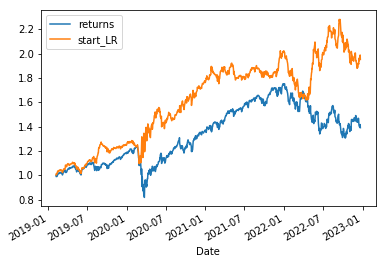

In [26]:
np.exp(test[['returns','start_LR']].cumsum()).plot()

In [27]:
test['direction_LR'].diff()

Date
2019-02-06    NaN
2019-02-07    0.0
2019-02-08    2.0
2019-02-11   -2.0
2019-02-12    2.0
             ... 
2022-12-16    2.0
2022-12-19   -2.0
2022-12-20    2.0
2022-12-21    0.0
2022-12-22    0.0
Name: direction_LR, Length: 979, dtype: float64

In [28]:
test['direction_LR']-test['direction_LR'].shift()

Date
2019-02-06    NaN
2019-02-07    0.0
2019-02-08    2.0
2019-02-11   -2.0
2019-02-12    2.0
             ... 
2022-12-16    2.0
2022-12-19   -2.0
2022-12-20    2.0
2022-12-21    0.0
2022-12-22    0.0
Name: direction_LR, Length: 979, dtype: float64

In [29]:
x=test[test['direction_LR']==1]
y=test[test['direction_LR']==-1]

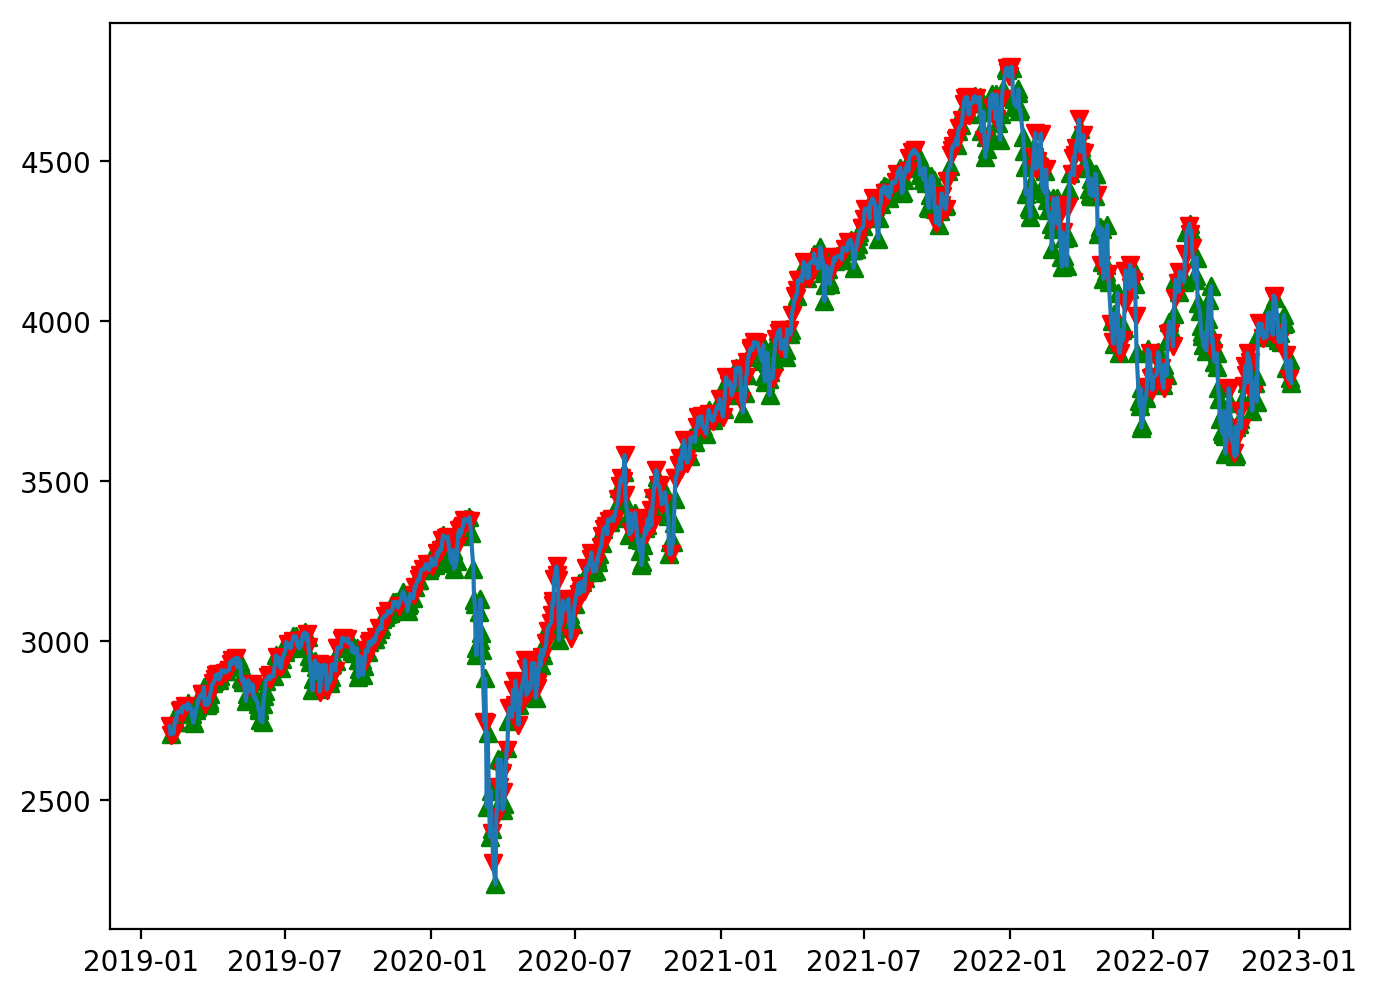

In [30]:
plt.figure(figsize=(8, 6), dpi=200)
plt.plot(np.array(test.index),test.Close.values)
plt.scatter(np.array(x.index),x.Close.values,color='g',marker='^')
plt.scatter(np.array(y.index),y.Close.values,color='r',marker='v')

In [31]:
(test['direction_LR'].diff()!=0).value_counts()

False    519
True     460
Name: direction_LR, dtype: int64

In [32]:
test[test['direction_LR'].diff()!=0]

,Open,High,Low,Close,Adj Close,Volume,returns,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,prediction_LR,direction_LR,start_LR
Date,,,,,,,,,,,,,,,
2019-02-06,2735.050049,2738.080078,2724.149902,2731.610107,2731.610107,3486590000,-0.002227,0.004697,0.006753,0.000898,0.008561,0.015430,-0.001112,-1,0.002227
2019-02-08,2692.360107,2708.070068,2681.830078,2707.879883,2707.879883,3649510000,0.000676,-0.009401,-0.002227,0.004697,0.006753,0.000898,0.000503,1,0.000676
2019-02-11,2712.399902,2718.050049,2703.790039,2709.800049,2709.800049,3395330000,0.000709,0.000676,-0.009401,-0.002227,0.004697,0.006753,-0.000171,-1,-0.000709
2019-02-12,2722.610107,2748.189941,2722.610107,2744.729980,2744.729980,3843020000,0.012808,0.000709,0.000676,-0.009401,-0.002227,0.004697,0.000449,1,0.012808
2019-02-19,2769.280029,2787.330078,2767.290039,2779.760010,2779.760010,3535270000,0.001498,0.010820,-0.002655,0.003019,0.012808,0.000709,-0.000452,-1,-0.001498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-08,3947.790039,3974.189941,3935.830078,3963.510010,3963.510010,4006900000,0.007494,-0.001864,-0.014504,-0.018056,-0.001195,-0.000868,0.001218,1,0.007494
2022-12-15,3958.370117,3958.370117,3879.449951,3895.750000,3895.750000,4493900000,-0.025237,-0.006071,0.007263,0.014178,-0.007377,0.007494,-0.000239,-1,0.025237
2022-12-16,3890.909912,3890.909912,3827.909912,3852.360107,3852.360107,7493660000,-0.011200,-0.025237,-0.006071,0.007263,0.014178,-0.007377,0.001638,1,-0.011200
